In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv(r'/content/Online Retail.csv', encoding='latin-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [30]:
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())

data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  Unite

# **Point to be notice**
* The Dataset has Rows: 541909 and Columns:8
* The Dataset has 3 types of columns: strings(5), integer(1), float(2)
* The Dataset has Missing values in Customer ID (135080) and Description (1454)
* The Dataset has duplicates (5268)
* Aslo check for negative value and outliers in Quantity and Price




# **Data Cleaning**

Missing Values

In [31]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",data.shape)
data.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",data.shape)

Shape of data before removing NaN's CustomerID (541909, 8)
Shape of data after removing NaN's CustomerID (406829, 8)


In [32]:
print("Missing values in each column after cleaning customerID :\n ", data.isnull().sum())

Missing values in each column after cleaning customerID :
  InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Removing duplicates

In [33]:
#Removing duplicates

print("Number of duplicates before cleaning :", data.duplicated().sum())
data = data.drop_duplicates(keep= 'first')
print("Number of duplicates after cleaning :", data.duplicated().sum())



Number of duplicates before cleaning : 5225
Number of duplicates after cleaning : 0


Checking for negative values

In [34]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.UnitPrice<0).sum())

Negative value in Quantity is: 8872
Negative value in Price is: 0


In [35]:
data = data[(data['Quantity'] > 0)]
data = data.drop_duplicates(keep="first")
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


Removing Outliers

In [36]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

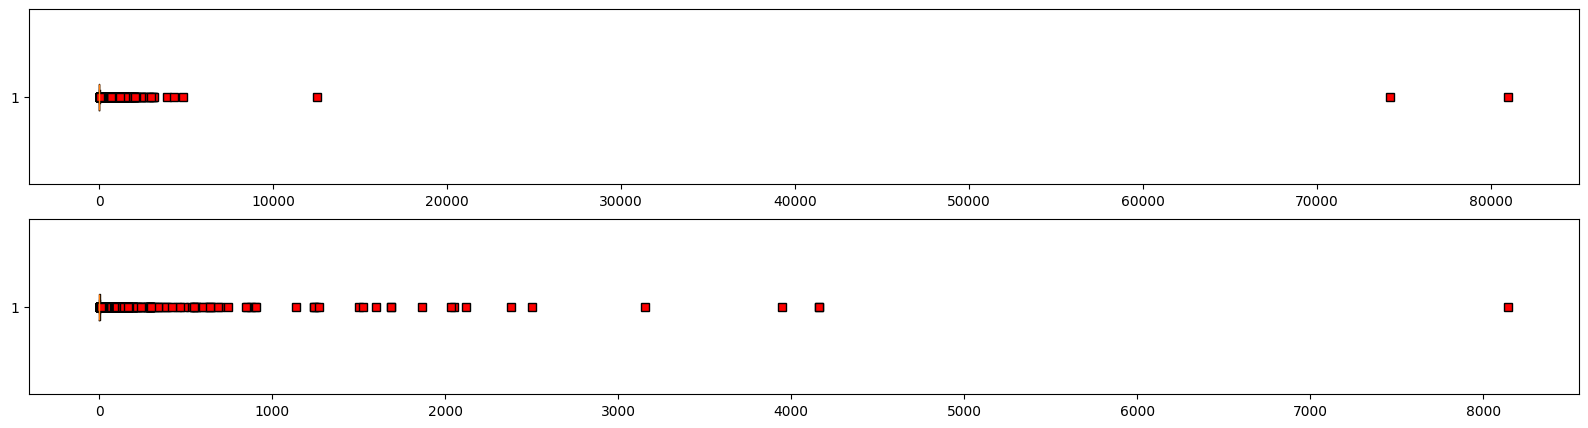

In [37]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [38]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "UnitPrice")

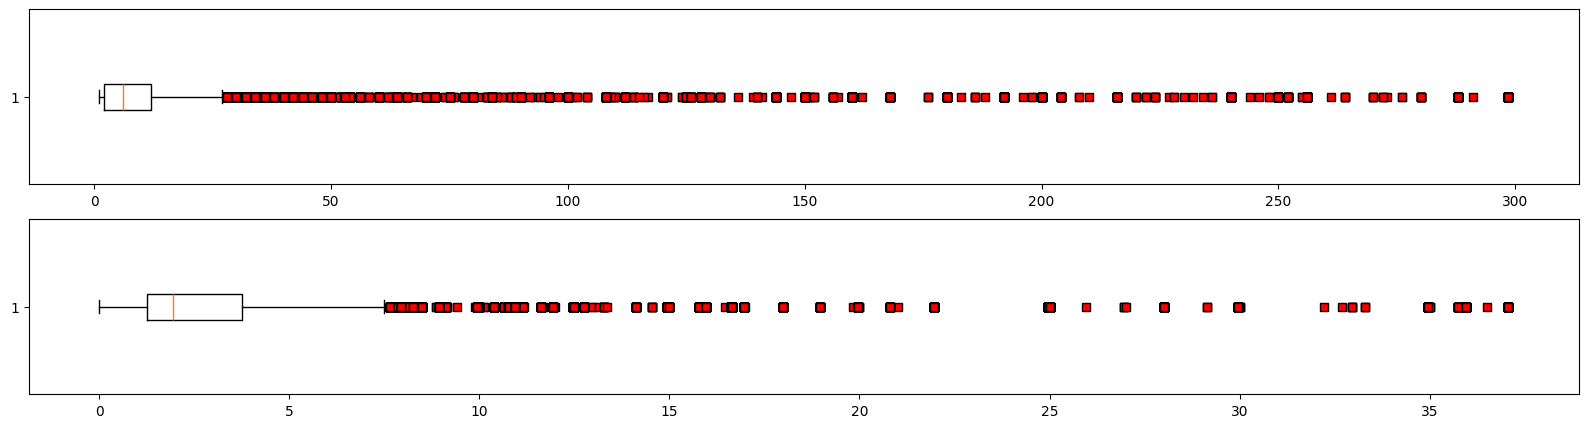

In [39]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# **EDA**

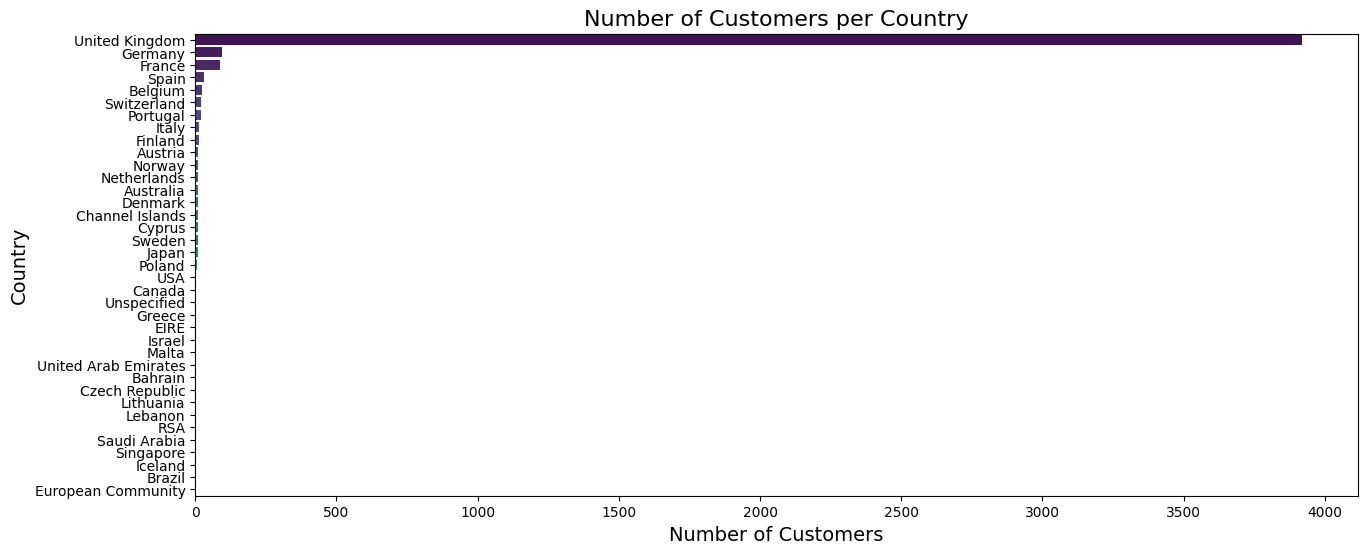

In [40]:
customers_by_country = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x=customers_by_country.values, y=customers_by_country.index, palette="viridis")
plt.title('Number of Customers per Country', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

UK has the highest number of customers,ie 3950 most of customers are from UK the next highest is germany,which has ONLY 95 customers.

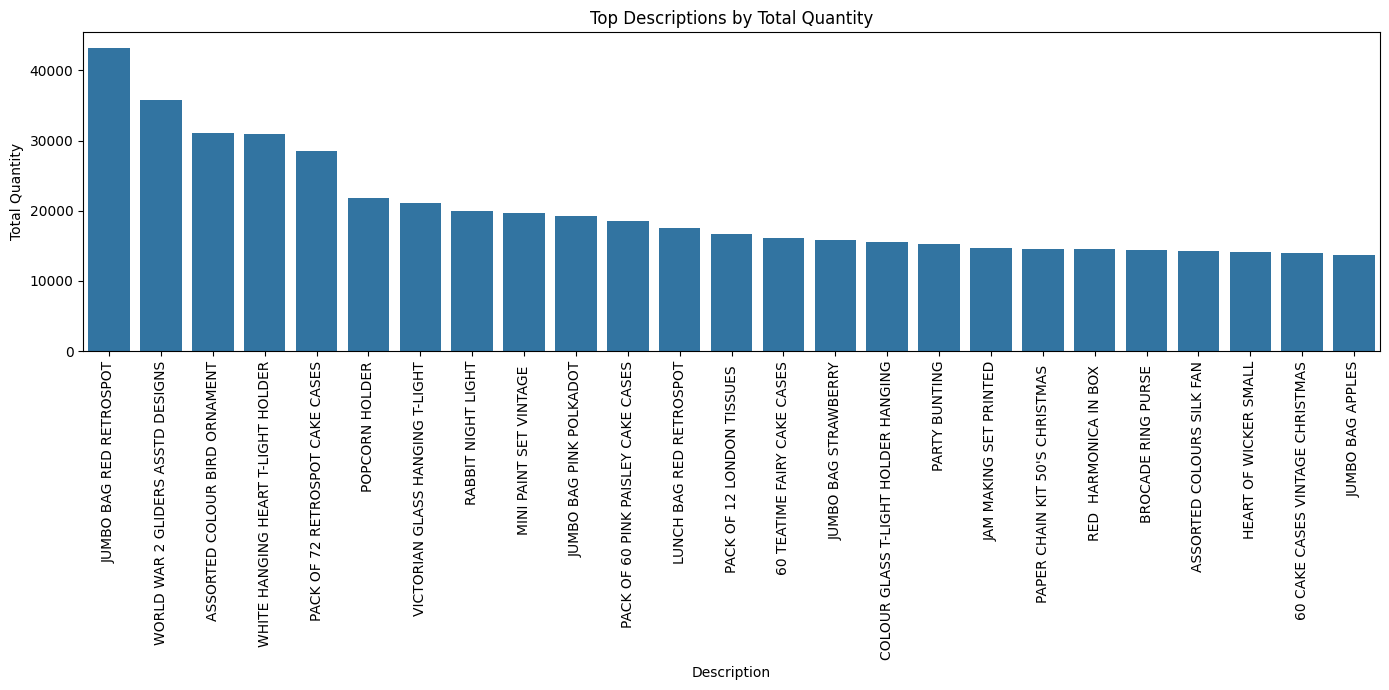

In [42]:
#Graph of top 25 items sold according to total quantities sold
quantity_by_description = data.groupby('Description')['Quantity'].sum()

# Sort by quantity to display top descriptions
top_descriptions = quantity_by_description.sort_values(ascending=False).head(25)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_descriptions.index, y=top_descriptions.values)
plt.xlabel("Description")
plt.ylabel("Total Quantity")
plt.title("Top Descriptions by Total Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

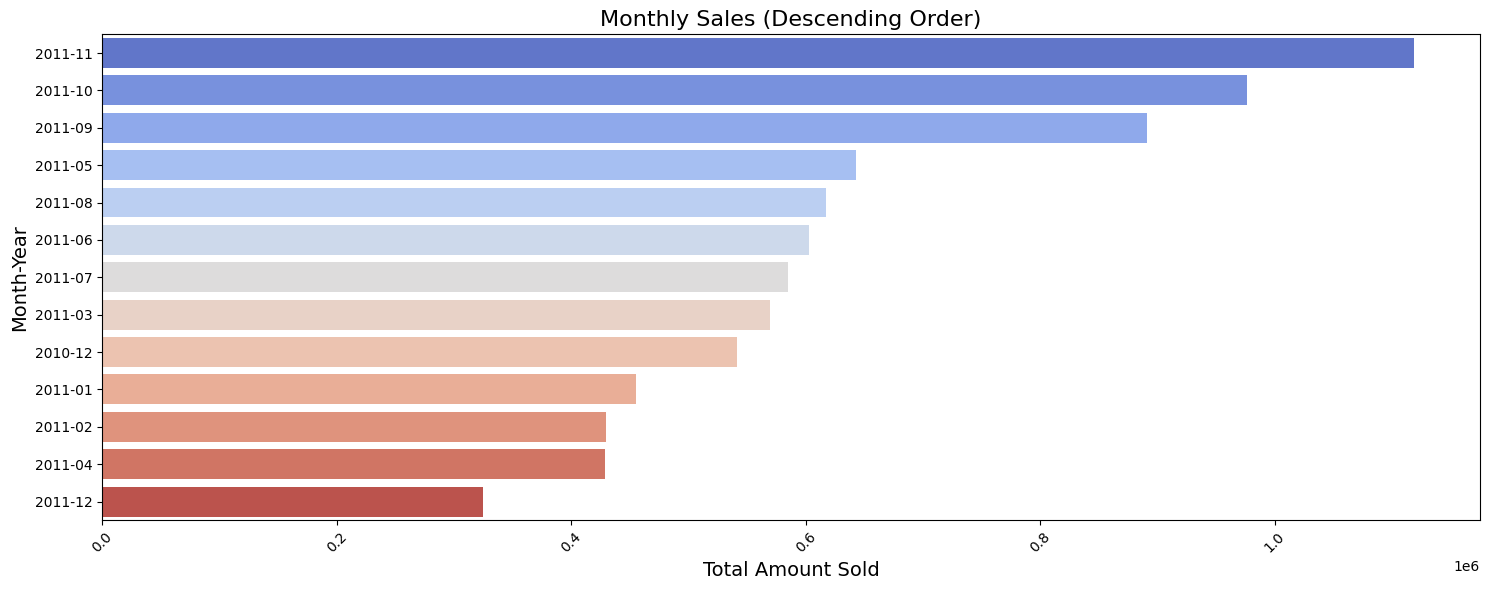

In [43]:
# Bar chart (Total amt sold in a month of a yr)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
data['Month-Year'] = data['InvoiceDate'].dt.to_period('M')
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

monthly_sales = data.groupby('Month-Year')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=monthly_sales.values, y=monthly_sales.index, palette="coolwarm")
plt.title('Monthly Sales (Descending Order)', fontsize=16)
plt.xlabel('Total Amount Sold', fontsize=14)
plt.ylabel('Month-Year', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After 2011 july, as the time progress, we can see increase in the sales, as total amount of all goods sold per month increases.

In [44]:
# Number of unique values in each column
unique_counts = data.nunique()
unique_counts

,0
InvoiceNo,18536
StockCode,3665
Description,3877
Quantity,165
InvoiceDate,17286
UnitPrice,353
CustomerID,4339
Country,37
Month-Year,13
TotalPrice,2672


There are 2725 different customers from 35 different countries, buying 3118 different items.

In [45]:
# The number of unique values in CustomerID is
unique_customer_ids = data['CustomerID'].nunique()
print(f"Number of unique customer IDs: {unique_customer_ids}")

Number of unique customer IDs: 4339


In [46]:
# total amount
data['TotalAmount'] = data['UnitPrice'] * data['Quantity']
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month-Year,TotalPrice,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,22.00


In [47]:
data['TotalAmount'].describe()

,TotalAmount
count,392732.000000
mean,20.839399
std,52.127192
min,0.000000
25%,4.950000
50%,12.390000
75%,19.800000
max,3268.575000


In [48]:
#Group by CustomerID and Country, then sum the TotalAmount
df1 = data.groupby(['CustomerID', 'Country'])['TotalAmount'].sum().reset_index()
df1

,CustomerID,Country,TotalAmount
0,12346.0,United Kingdom,310.44
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1770.78
3,12349.0,Italy,1491.72
4,12350.0,Norway,331.46
...,...,...,...
4342,18280.0,United Kingdom,180.60
4343,18281.0,United Kingdom,80.82
4344,18282.0,United Kingdom,178.05
4345,18283.0,United Kingdom,2045.53


### **Finding top 5 customers by the total amount they brought**

In [49]:
# We sorting the DataFrame by TotalAmount in descending order
df1_sorted = df1.sort_values(by='TotalAmount', ascending=False)
df1_sorted

,CustomerID,Country,TotalAmount
1698,14646.0,Netherlands,266163.525
4210,18102.0,United Kingdom,231584.345
1888,14911.0,EIRE,138919.840
3737,17450.0,United Kingdom,131550.645
57,12415.0,Australia,120210.355
...,...,...,...
4107,17956.0,United Kingdom,12.750
3023,16454.0,United Kingdom,6.900
1802,14792.0,United Kingdom,6.200
3226,16738.0,United Kingdom,3.750


1. CustomerID 14646 from Netherlands had ordered items worth 203948.19 dollars.
2. CustomerID 18102 from UK had ordered items worth 203146.86 dollars.
3. CustomerID 17450 from UK had ordered items worth 161182.98 dollars.
4. CustomerID 12415 from Australia had ordered items worth 118559.65 dollars.
5. CustomerID 14156.0 from EIRE had ordered items worth 104725.42 dollars.

In [50]:
#total amount by every country and order in descending order
df2 = df1.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).reset_index()
df2

,Country,TotalAmount
0,United Kingdom,6656948.344
1,Netherlands,271400.955
2,EIRE,258772.090
3,Germany,225534.030
4,France,197296.335
5,Australia,133682.510
6,Spain,60374.875
7,Switzerland,56149.950
8,Belgium,41193.450
9,Sweden,35335.205


In [51]:
import copy
df3 = copy.deepcopy(df2)
df3.loc[7:, 'Country'] = 'Others'
df3.head(6)

,Country,TotalAmount
0,United Kingdom,6656948.344
1,Netherlands,271400.955
2,EIRE,258772.090
3,Germany,225534.030
4,France,197296.335
5,Australia,133682.510


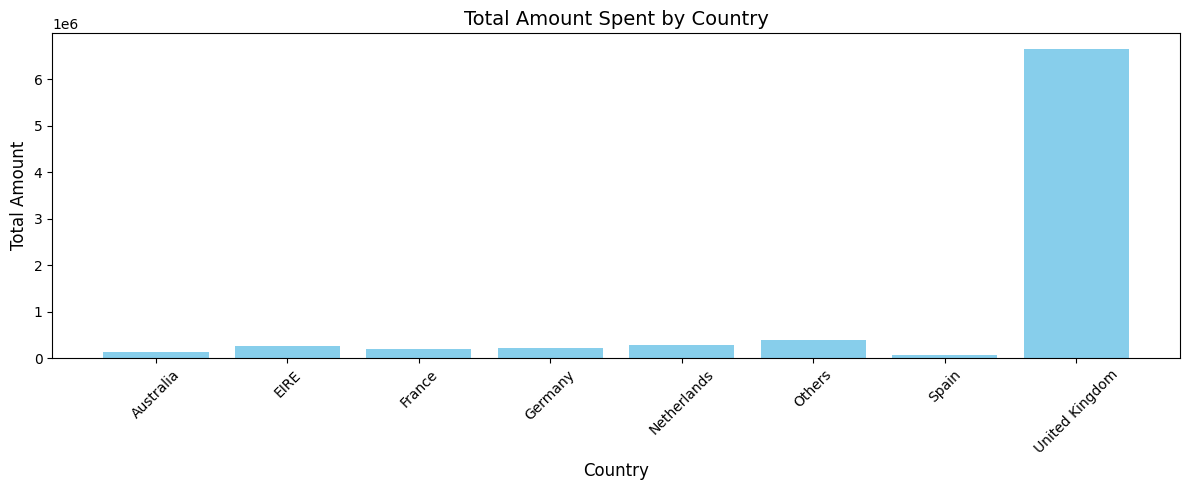

In [52]:
# Group by country and sum total amount for the modified df3
country_amount = df3.groupby('Country')['TotalAmount'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(12, 5))
plt.bar(country_amount['Country'], country_amount['TotalAmount'], color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Total Amount Spent by Country', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df3=data

- Customers from UK have spent most of their money.
####**Top 3 countries are:**
1. United Kingdom,amount ordered 5239128.904
2. Netherlands,amount ordered 208069.060
3. EIRE,amount ordered 205196.950





# **Feature Engineering**

In [53]:
#Creating Features for RFM Model
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

In [54]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [55]:
#RFM Featuring
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

RFM = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                 'InvoiceNo': lambda x: x.nunique(),
                                                 "TotalAmount": lambda x: x.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

RFM.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

RFM.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,310.44
1,12347.0,2,7,4310.00
2,12348.0,75,4,1770.78
3,12349.0,18,1,1491.72
4,12350.0,310,1,331.46


**Add new Feature : Interpurchase-Time**
* The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows :

T = L/(F-1) = (Tn - T1)/(F-1)

* T --> Interpurchase Time
* L --> Shopping Cycle
* F --> Frequency
* T1 --> First purchase
* Tn --> Last purchase

Note: We consider only those customers who made purchase more than once.

In [56]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4310.00
12348.0,75,4,1770.78
12352.0,36,8,1756.34
12356.0,22,3,2811.43
12358.0,1,2,1150.42


In [57]:
Shopping_Cycle = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head()

,Recency,Frequency,Monetary,Shopping_Cycle
CustomerID,,,,
12347.0,2,7,4310.00,365
12348.0,75,4,1770.78,282
12352.0,36,8,1756.34,260
12356.0,22,3,2811.43,302
12358.0,1,2,1150.42,149


In [58]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time
CustomerID,,,,
12347.0,2,7,4310.00,52
12348.0,75,4,1770.78,70
12352.0,36,8,1756.34,32
12356.0,22,3,2811.43,100
12358.0,1,2,1150.42,74


# **Modelling with KMeans Algorithm**

In [59]:
#Libraries for algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

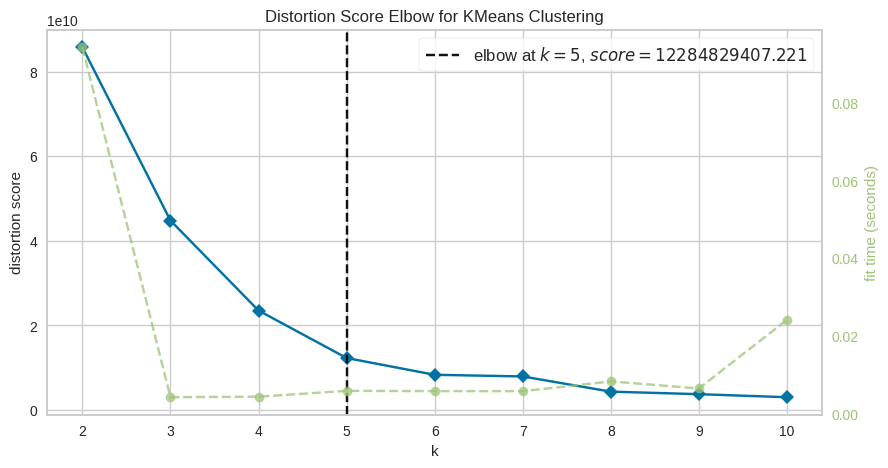

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(RFMT)
Elbow_M.show()


In [61]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [63]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
CustomerID,,,,,
12347.0,2,7,4310.00,52,0
12348.0,75,4,1770.78,70,0
12352.0,36,8,1756.34,32,0
12356.0,22,3,2811.43,100,0
12358.0,1,2,1150.42,74,0


In [64]:
print(RFMT['Clusters'].value_counts())


Clusters
0    2813
2      25
3       5
1       2
Name: count, dtype: int64


In [65]:
kmeans.cluster_centers_

array([[5.89719161e+01, 5.44258798e+00, 1.96866850e+03, 4.64504088e+01],
       [5.00000000e-01, 6.70000000e+01, 2.48873935e+05, 5.00000000e+00],
       [7.04000000e+00, 4.97600000e+01, 4.13244604e+04, 1.08000000e+01],
       [8.80000000e+00, 7.08000000e+01, 1.19436999e+05, 7.80000000e+00]])

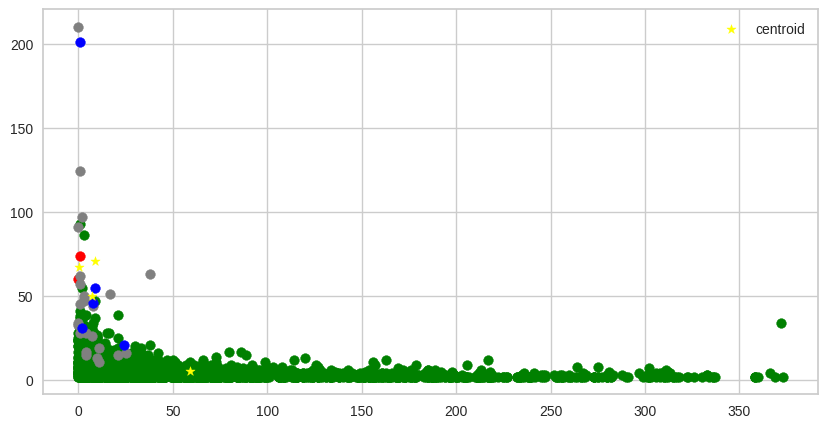

In [67]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))


Silhouette score : 0.9386494916906333


# **DBSCAN**

In [69]:
from sklearn.cluster import DBSCAN

In [70]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMT[['Recency', 'Frequency', 'Monetary', 'Interpurchase_Time']])


In [71]:
silhouette_scores = []

for min_samples in range(1, 6):
    dbscan = DBSCAN(eps=4, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    score = silhouette_score(scaled_data, clusters) if len(set(clusters)) > 1 else None
    silhouette_scores.append((min_samples, score))
    print(f"Silhouette Score for min_samples={min_samples}: {score if score is not None else 'Cannot be calculated'}")



Silhouette Score for min_samples=1: 0.9104208440422916
Silhouette Score for min_samples=2: 0.9165189143206347
Silhouette Score for min_samples=3: 0.9207657545082483
Silhouette Score for min_samples=4: 0.9207657545082483
Silhouette Score for min_samples=5: 0.9071822098955388


* The best Silhouette Score is on eps 3

In [72]:
from sklearn.mixture import GaussianMixture

In [73]:
silhouette_scores = []

for n_components in range(2, 6):
    gmm = GaussianMixture(n_components=n_components)
    RFMT['Clusters_GMM'] = gmm.fit_predict(scaled_data)